<a href="https://colab.research.google.com/github/gitmystuff/INFO5737/blob/main/Anomaly_Detection_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection II

Your Name

## Isolation Forest

### Outliers

Outliers are data points that deviate significantly from the general pattern or distribution of the rest of the data. They are observations that are far removed from the "typical" or "expected" values.

**Types of Outliers:**

* **Point Outliers:** Single data points that are unusual compared to the rest of the data (e.g., a very high income in a neighborhood).
* **Contextual Outliers:** Data points that are outliers only in a specific context (e.g., high electricity usage at night in a residential area).
* **Collective Outliers:** A group of data points that are unusual when considered together, even if individual points might not be outliers on their own (e.g., a coordinated series of small fraudulent transactions).

**Why are Outliers Important?**

* **Data Quality:** They can indicate errors in data collection or measurement.
* **Insights:** They can reveal valuable information about rare events or unusual behavior (e.g., fraud, network intrusions).
* **Model Accuracy:** They can distort statistical analyses and machine learning models.

**Python Methods for Outlier Detection:**

Here are some common Python methods for detecting outliers:

**1. Statistical Methods:**

   * **Z-Score:**
        * Calculates how many standard deviations a data point is away from the mean.
        * Points with a Z-score above a certain threshold (e.g., 3) are considered outliers.

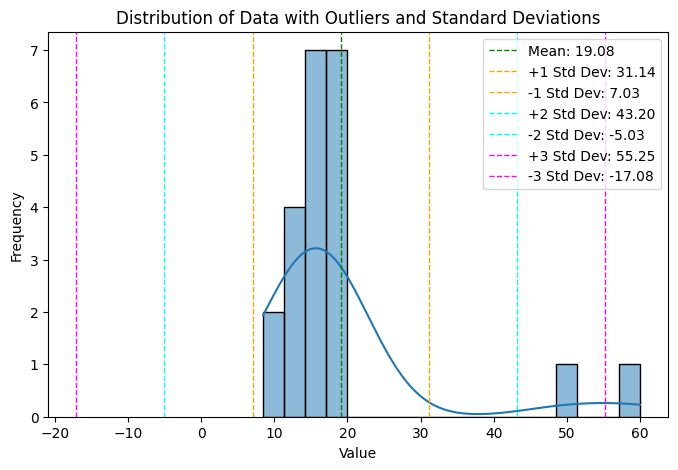

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

normal_values = np.random.normal(loc=15, scale=3, size=20)
outlier_values = [50, 60]
data = {'value': np.concatenate([normal_values, outlier_values])}
df = pd.DataFrame(data)

df['z_score'] = np.abs(stats.zscore(df['value']))
df['is_outlier'] = df['z_score'] > 3

mean = df['value'].mean()
std = df['value'].std()

plt.figure(figsize=(8, 5))
sns.histplot(df['value'], kde=True)
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean + std, color='orange', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean + std:.2f}')
plt.axvline(mean - std, color='orange', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean - std:.2f}')
plt.axvline(mean + 2 * std, color='cyan', linestyle='dashed', linewidth=1, label=f'+2 Std Dev: {mean + 2 * std:.2f}')
plt.axvline(mean - 2 * std, color='cyan', linestyle='dashed', linewidth=1, label=f'-2 Std Dev: {mean - 2 * std:.2f}')
plt.axvline(mean + 3 * std, color='magenta', linestyle='dashed', linewidth=1, label=f'+3 Std Dev: {mean + 3 * std:.2f}')
plt.axvline(mean - 3 * std, color='magenta', linestyle='dashed', linewidth=1, label=f'-3 Std Dev: {mean - 3 * std:.2f}')
# plt.axvline(df[df['is_outlier'] == True]['value'].min(), color='red', linestyle='dashed', linewidth=1, label='Outlier Bounds')
# plt.axvline(df[df['is_outlier'] == True]['value'].max(), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Data with Outliers and Standard Deviations')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* **IQR (Interquartile Range):**
  * Defines a "normal" range using the 1st quartile (Q1) and 3rd quartile (Q3).
  * Points outside 1.5 * IQR from Q1 or Q3 are considered outliers.

20    50.0
21    60.0
Name: value, dtype: float64


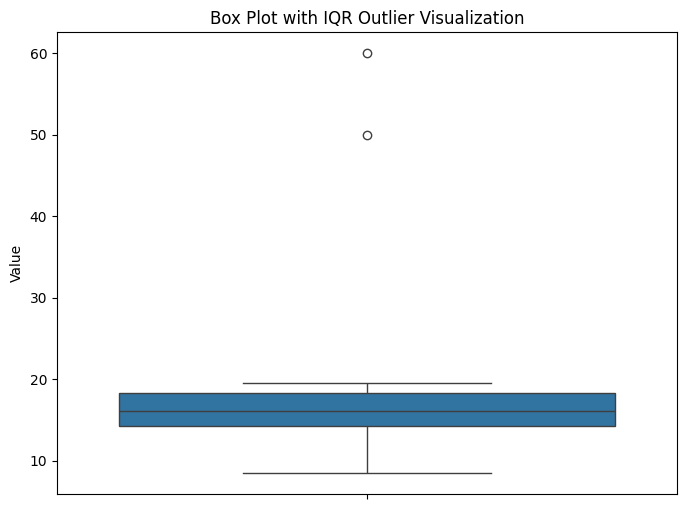

In [ ]:
def find_iqr_outliers(data):
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return data[(data < lower_bound) | (data > upper_bound)]

outliers = find_iqr_outliers(df['value'])
print(outliers)

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['value'])
plt.title('Box Plot with IQR Outlier Visualization')
plt.ylabel('Value')
plt.show()

**2. Machine Learning Methods:**

   * **Isolation Forest:**
        * An unsupervised algorithm that isolates outliers by randomly partitioning the data space.
        * Anomalies are "easier" to isolate and have shorter path lengths in the trees.

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1)  # Adjust contamination
model.fit(df[['value']])
df['anomaly'] = model.predict(df[['value']])
outliers = df[df['anomaly'] == -1]
print(outliers)

### PCA

* Dimensionality Notebook (DSChunks)

Principal Component Analysis (PCA) is a powerful technique used for dimensionality reduction. In simpler terms, it helps to simplify complex data by reducing the number of variables while retaining the most important information.

Here's a breakdown of what PCA is and how it works:

**What is PCA?**

* **Dimensionality Reduction:** PCA's primary goal is to reduce the number of features (or dimensions) in a dataset. When you have a dataset with many variables (e.g., hundreds or thousands), it can be difficult to analyze and visualize. PCA helps to simplify this.
* **Information Preservation:** While reducing dimensionality, PCA tries to keep as much of the original information as possible. It does this by identifying the most important patterns or trends in the data.
* **Unsupervised Learning:** PCA is an unsupervised learning technique, meaning it doesn't need labeled data to work. It finds patterns in the data itself.

**How Does PCA Work?**

PCA works by transforming the original variables into a new set of variables called "principal components." These principal components have some special properties:

1.  **Principal Components are Linear Combinations:** Each principal component is a linear combination of the original variables. This means it's calculated by adding up the original variables, each multiplied by a specific weight.
2.  **Principal Components are Uncorrelated:** The principal components are uncorrelated with each other. This means they measure different, independent aspects of the data.
3.  **Principal Components Capture Variance:** The most important principal components are the ones that capture the most variance (spread or variability) in the data. The first principal component captures the most variance, the second captures the second most, and so on.

**Steps Involved in PCA:**

1.  **Standardize the Data:** It's important to standardize the data before applying PCA. This means scaling the data so that each variable has a mean of 0 and a standard deviation of 1. This prevents variables with larger scales from dominating the PCA results.
2.  **Calculate the Covariance Matrix:** The covariance matrix measures how much the variables change together. It helps to identify relationships between the variables.
3.  **Calculate Eigenvectors and Eigenvalues:**
    * **Eigenvectors:** These are vectors that define the directions of the principal components. They show the directions in which the data has the most variance.
    * **Eigenvalues:** These values indicate the magnitude of the variance captured by each principal component. The higher the eigenvalue, the more important the corresponding principal component.
4.  **Select Principal Components:**
    * The principal components are ordered by their eigenvalues, from highest to lowest.
    * You can choose to keep the top k principal components, where k is the desired number of dimensions. This reduces the dimensionality of the data while preserving the most important information.
5.  **Transform the Data:** The original data is transformed into the new coordinate system defined by the selected principal components.

**Why Use PCA?**

* **Visualization:** PCA can reduce high-dimensional data to 2 or 3 dimensions, making it possible to visualize the data in a scatter plot and identify patterns or clusters.
* **Feature Extraction:** PCA can extract the most important features from a dataset, which can be useful for machine learning.
* **Noise Reduction:** PCA can help to reduce noise in the data by focusing on the principal components that capture the most significant variance.
* **Speeding Up Machine Learning Algorithms:** Reducing the number of features can speed up the training and prediction time of machine learning algorithms.

In summary, PCA is a valuable technique for simplifying complex data by reducing dimensionality while retaining essential information. It has applications in various fields, including data analysis, machine learning, and image processing.

### Anomaly Detection Through Isolation

Isolation Forest is an unsupervised machine learning algorithm specifically designed for **anomaly detection**. Unlike many other anomaly detection methods that try to model "normal" data and then identify deviations, Isolation Forest takes a different approach: it explicitly tries to **isolate** anomalies.

Here's a breakdown of the core ideas behind Isolation Forest:

**1. The Principle of Isolation:**

* Anomalies are data points that are "few and different." This means they have attribute values that are far from the typical values of the majority of the data.
* Because anomalies are different, they should be easier to separate (isolate) from the rest of the data with fewer partitioning steps.

**2. Isolation Trees (iTrees):**

* Isolation Forest builds an ensemble (a "forest") of **Isolation Trees (iTrees)**.
* Each iTree is a binary tree constructed by randomly partitioning the data. The partitioning process is as follows:
    * **Random Feature Selection:** A feature (attribute) from the dataset is randomly selected.
    * **Random Split Value Selection:** A split value within the range of the selected feature is randomly chosen.
    * **Data Partitioning:** The data points are divided into two child nodes based on whether their value for the chosen feature is below or above the split value.
    * This process is repeated recursively until each data point is isolated in its own leaf node or a predefined tree height limit is reached.

**3. Path Length:**

* The key concept in Isolation Forest is the **path length** of a data point in an iTree. The path length is the number of edges traversed from the root of the tree to the leaf node containing that data point.
* **Anomalies tend to have shorter path lengths.** This is because they are different and can be isolated with fewer random partitions.
* **Normal data points tend to have longer path lengths** because they are similar to other points and require more partitions to be isolated.

**4. Anomaly Score:**

* To determine an anomaly score for each data point, the algorithm calculates the average path length of that point across all the iTrees in the forest.
* This average path length is then normalized to produce an **anomaly score** between 0 and 1:
    * Scores closer to 1 indicate a higher likelihood of being an anomaly.
    * Scores closer to 0 indicate that the data point is likely normal.
    * A score around 0.5 typically means the point is neither clearly an anomaly nor a normal instance.

**In essence, Isolation Forest works by:**

* Randomly partitioning the data in multiple trees.
* Measuring how quickly each data point gets isolated.
* Assigning an anomaly score based on the average isolation path length across all trees. Data points that are isolated in fewer steps are considered more likely to be anomalies.

**Advantages of Isolation Forest:**

* **Efficient:** It has a linear time complexity with respect to the number of data points and features, making it suitable for large datasets.
* **Fast:** The random partitioning process is computationally inexpensive.
* **Effective for High-Dimensional Data:** It can handle datasets with many features.
* **Unsupervised:** It doesn't require labeled anomaly data for training.
* **Robust to Irrelevant Features:** The random feature selection helps in focusing on the features that contribute to isolating anomalies.
* **Low Memory Usage:** The memory requirements are relatively low compared to some other anomaly detection methods.

**Use Cases in Cybersecurity (and beyond):**

* **Network Intrusion Detection:** Identifying unusual network traffic patterns that might indicate attacks.
* **Fraud Detection:** Detecting anomalous financial transactions.
* **Endpoint Security:** Identifying unusual process behavior or file modifications on computers.
* **System Monitoring:** Detecting abnormal resource usage or system events.
* **Industrial Anomaly Detection:** Identifying faulty machinery behavior based on sensor data.

By understanding the principles of isolation, path length, and anomaly scoring, you can effectively use and explain the Isolation Forest algorithm in your cybersecurity class for analyzing network packets and detecting anomalies.

Note: The dataset we are using is a subset from a Machine Learning competition run by Xeek and FORCE 2020 (Bormann et al., 2020). It is released under a NOLD 2.0 licence from the Norwegian Government, details of which can be found here: Norwegian Licence for Open Government Data (NLOD) 2.0.

The full dataset can be accessed at the following link: https://doi.org/10.5281/zenodo.4351155.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/refs/heads/main/Xeek_Well.csv')
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,17717.000000,17635.000000,17717.000000,17521.000000,17717.000000,13346.000000,17662.000000,17708.000000
mean,1837.363674,14.006030,1.474893,2.134868,59.154202,0.384906,4.095357,127.240157
std,784.314256,3.873367,1.356896,0.223124,29.483140,0.152182,8.318817,36.507057
min,485.256000,7.325138,0.264479,1.438999,6.024419,0.039013,1.525528,7.415132
25%,1158.464000,12.045594,0.760341,1.978679,41.260944,0.249594,2.400372,88.318405
50%,1831.672000,13.956721,1.007371,2.042522,62.451527,0.451589,2.910137,142.943245
75%,2515.672000,17.324830,1.554278,2.333431,75.398460,0.510851,4.222030,153.226116
max,3200.128000,25.717396,14.046203,2.648847,804.298950,0.733152,365.575592,207.382553


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       17717 non-null  object 
 1   DEPTH_MD   17717 non-null  float64
 2   GROUP      17717 non-null  object 
 3   FORMATION  15093 non-null  object 
 4   CALI       17635 non-null  float64
 5   RDEP       17717 non-null  float64
 6   RHOB       17521 non-null  float64
 7   GR         17717 non-null  float64
 8   NPHI       13346 non-null  float64
 9   PEF        17662 non-null  float64
 10  DTC        17708 non-null  float64
 11  LITH       17717 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


Absolutely! Let's break down the dataset information presented in the image.

**Context:**

The image shows the output of the `df.describe()` method in Python's Pandas library after reading a CSV file named 'Xeek_Well_15-9-15.csv' into a DataFrame called `df`. This method provides descriptive statistics of the numerical columns in the DataFrame.

**Dataset Description:**

The dataset appears to contain well log data, likely from an oil or gas exploration context. Each row represents a measurement taken at a specific depth in the well, and the columns represent various geophysical measurements.

**Columns and Their Descriptive Statistics:**

Here's a detailed explanation of each column and the statistics provided:

* **DEPTH_MD:**
    * This column likely represents the measured depth in meters (or feet) in the well.
    * **count:** 17717 - There are 17,717 data points (depth measurements).
    * **mean:** 1837.363674 - The average depth is approximately 1837.36 meters.
    * **std:** 784.314256 - The standard deviation indicates the spread or variability of the depth measurements.
    * **min:** 485.256000 - The minimum depth recorded is 485.256 meters.
    * **25%:** 1158.464000 - 25% of the depth measurements are less than or equal to 1158.464 meters.
    * **50%:** 1831.672000 - The median depth is 1831.672 meters (half the measurements are above, half are below).
    * **75%:** 2515.672000 - 75% of the depth measurements are less than or equal to 2515.672 meters.
    * **max:** 3200.128000 - The maximum depth recorded is 3200.128 meters.

* **CALI:**
    * This column likely represents the caliper log, which measures the diameter of the wellbore.
    * **count:** 17635.000000 - There are 17,635 caliper measurements (note: fewer than DEPTH_MD, indicating missing data).
    * **mean:** 14.006030 - The average caliper measurement is 14.006030 (units depend on the tool).
    * **std:** 3.873367 - The standard deviation indicates the variability in wellbore diameter.
    * **min:** 7.325138 - The minimum caliper measurement.
    * **25%:** 12.045594
    * **50%:** 13.956721
    * **75%:** 17.324830
    * **max:** 25.717396

* **RDEP:**
    * This column likely represents the deep resistivity log, which measures the electrical resistance of the formation far from the wellbore.
    * **count:** 17717.000000
    * **mean:** 1.474893
    * **std:** 1.356896
    * **min:** 0.264479
    * **25%:** 0.760341
    * **50%:** 1.007371
    * **75%:** 1.554278
    * **max:** 14.046203

* **RHOB:**
    * This column likely represents the bulk density log, which measures the density of the formation.
    * **count:** 17521.000000 - Again, missing data.
    * **mean:** 2.134858
    * **std:** 0.223124
    * **min:** 1.438999
    * **25%:** 1.978679
    * **50%:** 2.042522
    * **75%:** 2.333431
    * **max:** 2.648847

* **GR:**
    * This column likely represents the gamma ray log, which measures the natural radioactivity of the formation.
    * **count:** 17717.000000
    * **mean:** 59.154202
    * **std:** 29.483140
    * **min:** 6.024419
    * **25%:** 41.260944
    * **50%:** 62.451527
    * **75%:** 75.398460
    * **max:** 804.298950 - This high max value suggests potential outliers or unusual readings.

* **NPHI:**
    * This column likely represents the neutron porosity log, which measures the porosity (pore space) of the formation.
    * **count:** 13346.000000 - Significant missing data.
    * **mean:** 0.384906
    * **std:** 0.152182
    * **min:** 0.039013
    * **25%:** 0.249594
    * **50%:** 0.451589
    * **75%:** 0.510851
    * **max:** 0.733152

* **PEF:**
    * This column likely represents the photoelectric effect log, which measures the formation's response to gamma rays.
    * **count:** 17662.000000
    * **mean:** 4.095857
    * **std:** 8.318817 - A relatively high standard deviation suggests significant variability.
    * **min:** 1.525528
    * **25%:** 2.400372
    * **50%:** 2.910137
    * **75%:** 4.222030
    * **max:** 365.575592 - The extremely high max value points to outliers.

* **DTC:**
    * This column likely represents the compressional wave slowness (Delta-T Compressional) log, which measures the time it takes for a compressional sound wave to travel through the formation.
    * **count:** 17708.000000
    * **mean:** 127.240157
    * **std:** 36.507057
    * **min:** 7.415132
    * **25%:** 88.318405
    * **50%:** 142.943245
    * **75%:** 153.226116
    * **max:** 207.382553

**Observations:**

* **Missing Data:** The `CALI`, `RHOB`, and especially `NPHI` columns have fewer data points than `DEPTH_MD`, indicating missing values. This needs to be addressed before using the data for analysis or modeling.
* **Outliers:** The `GR` and `PEF` columns have very high maximum values, suggesting potential outliers that could skew statistical analyses.
* **Data Ranges:** The columns have vastly different ranges and units, which is typical for well log data. This often necessitates scaling or normalization before applying machine learning algorithms.

**In Summary:**

This dataset contains well log measurements with varying statistical properties and issues like missing data and outliers. Understanding these characteristics is crucial for proper data cleaning, preprocessing, and analysis to extract meaningful insights about the subsurface formation.

In [ ]:
print(df.shape)
df = df.dropna()
df.info()

(17717, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 13290 entries, 4371 to 17707
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       13290 non-null  object 
 1   DEPTH_MD   13290 non-null  float64
 2   GROUP      13290 non-null  object 
 3   FORMATION  13290 non-null  object 
 4   CALI       13290 non-null  float64
 5   RDEP       13290 non-null  float64
 6   RHOB       13290 non-null  float64
 7   GR         13290 non-null  float64
 8   NPHI       13290 non-null  float64
 9   PEF        13290 non-null  float64
 10  DTC        13290 non-null  float64
 11  LITH       13290 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.3+ MB


In [ ]:
anomaly_inputs = ['NPHI', 'RHOB']

In [ ]:
model_IF = IsolationForest(contamination=float(0.1),random_state=42)

In [ ]:
model_IF.fit(df[anomaly_inputs])

IsolationForest(contamination=0.1, random_state=42)

1.  **`anomaly_inputs = ['NPHI', 'RHOB']`**:
    * This line creates a list named `anomaly_inputs`.
    * The list contains two strings: 'NPHI' and 'RHOB'.
    * These strings likely represent column names in a Pandas DataFrame.
    * The code indicates that these two columns ('NPHI' and 'RHOB') will be used as the input features for the anomaly detection model.

2.  **`model_IF = IsolationForest(contamination=float(0.1), random_state=42)`**:
    * This line creates an instance of the `IsolationForest` class from scikit-learn.
    * The instance is assigned to the variable `model_IF`.
    * `contamination=float(0.1)`: This parameter tells the Isolation Forest algorithm to expect that approximately 10% of the data points are anomalies. It helps the algorithm determine a threshold for classifying data points as anomalies.
    * `random_state=42`: This parameter sets the random seed for the algorithm. Setting a random seed ensures that the results of the algorithm are reproducible. If you run the code multiple times with the same random seed, you will get the same results.

3.  **`model_IF.fit(df[anomaly_inputs])`**:
    * This line trains the `model_IF` (the Isolation Forest model) on the data.
    * `df[anomaly_inputs]`: This selects the columns specified in the `anomaly_inputs` list (i.e., 'NPHI' and 'RHOB') from a Pandas DataFrame called `df`. It creates a new DataFrame containing only these two columns.
    * `model_IF.fit(...)`: The `fit()` method is called on the Isolation Forest model to learn the patterns of "normal" data from the selected columns.

In summary, the code selects two columns from a DataFrame, configures an Isolation Forest model to detect anomalies assuming 10% contamination, and then trains the model on the selected data.

In [ ]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [ ]:
df.loc[:, ['NPHI', 'RHOB','anomaly_scores','anomaly'] ]

,NPHI,RHOB,anomaly_scores,anomaly
4371,0.541850,2.063168,0.094522,1
4372,0.545401,2.051136,0.095207,1
4373,0.548953,2.041540,0.099837,1
4374,0.549356,2.035698,0.105620,1
4375,0.543351,2.029099,0.117897,1
...,...,...,...,...
17703,0.257656,2.391858,0.108037,1
17704,0.264047,2.408428,0.088239,1
17705,0.269605,2.432385,0.075509,1
17706,0.270624,2.452091,0.058709,1


Okay, let's break down the code snippet without referencing the image.

The code performs anomaly detection using a trained Isolation Forest model on a Pandas DataFrame. It calculates anomaly scores and assigns anomaly labels to the data.

Here's a step-by-step explanation:

1.  **`df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])`**:
    * This line calculates an anomaly score for each data point using the trained Isolation Forest model (`model_IF`).
    * `model_IF.decision_function(df[anomaly_inputs])`:
        * `model_IF`: This is the trained Isolation Forest model.
        * `decision_function()`: This is a method of the Isolation Forest model that calculates an "anomaly score" for each data point. The anomaly score reflects how "isolated" a data point is; lower scores generally indicate higher likelihood of being an anomaly.
        * `df[anomaly_inputs]`: This selects the columns from the DataFrame `df` that were used as input features during the model training. These are the same columns for which we now want to calculate anomaly scores.
    * `df['anomaly_scores'] = ...`: The calculated anomaly scores are then assigned to a new column named `anomaly_scores` in the DataFrame `df`.

2.  **`df['anomaly'] = model_IF.predict(df[anomaly_inputs])`**:
    * This line assigns anomaly labels to each data point based on the anomaly scores calculated in the previous step.
    * `model_IF.predict(df[anomaly_inputs])`:
        * `model_IF`: The trained Isolation Forest model.
        * `predict()`: This is a method of the Isolation Forest model that assigns a label to each data point. Typically, it assigns:
            * `1`: for normal data points (inliers).
            * `-1`: for anomalous data points (outliers).
        * `df[anomaly_inputs]`: Again, this selects the input feature columns from the DataFrame.
    * `df['anomaly'] = ...`: The predicted anomaly labels (1 or -1) are assigned to a new column named `anomaly` in the DataFrame `df`.

3.  **`df.loc[:, ['NPHI', 'RHOB', 'anomaly_scores', 'anomaly']]`**:
    * This line selects and displays specific columns from the DataFrame `df`.
    * `df.loc[:, ... ]`: This is a way to select rows and columns by label in Pandas.
        * `:`: Selects all rows.
        * `['NPHI', 'RHOB', 'anomaly_scores', 'anomaly']`: Selects the columns named 'NPHI', 'RHOB', 'anomaly_scores', and 'anomaly'.
    * The result of this line is a new DataFrame (or a view of the original DataFrame) containing only the specified columns, which is then displayed. This allows you to see the original data ('NPHI', 'RHOB') along with the calculated anomaly information.

In summary, the code calculates anomaly scores and labels using the Isolation Forest model and then displays a subset of the DataFrame to show the original data and the anomaly results.

Mean values for normal and anomalous data:
             NPHI      RHOB  anomaly_scores
anomaly                                    
-1       0.336419  2.207107       -0.038207
 1       0.391291  2.171473        0.081091

Standard deviations:
             NPHI      RHOB  anomaly_scores
anomaly                                    
-1       0.211909  0.351914        0.031396
 1       0.142577  0.218886        0.041261

Descriptive statistics for normal data:
               NPHI          RHOB
count  11961.000000  11961.000000
mean       0.391291      2.171473
std        0.142577      0.218886
min        0.090885      1.773618
25%        0.257052      1.990367
50%        0.457047      2.095719
75%        0.509615      2.371614
max        0.606748      2.583699

Descriptive statistics for anomalous data:
              NPHI         RHOB
count  1329.000000  1329.000000
mean      0.336419     2.207107
std       0.211909     0.351914
min       0.039013     1.438999
25%       0.104261     1.851881


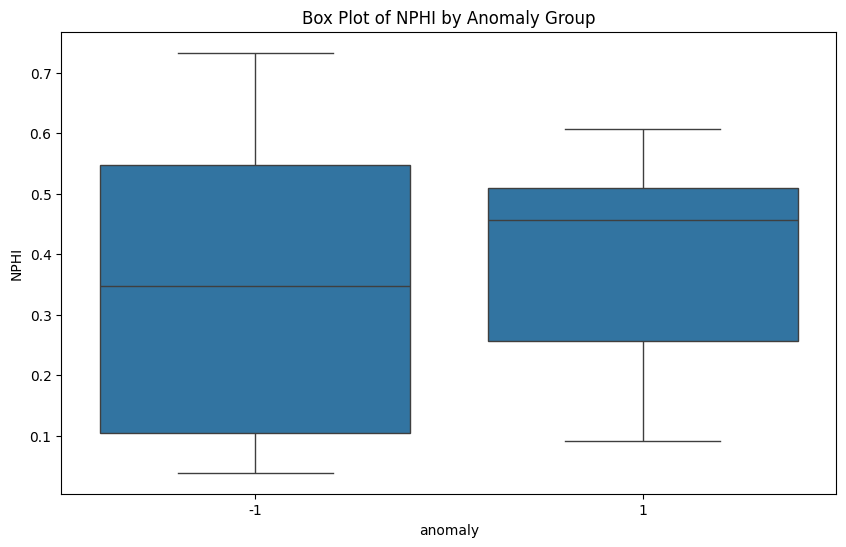

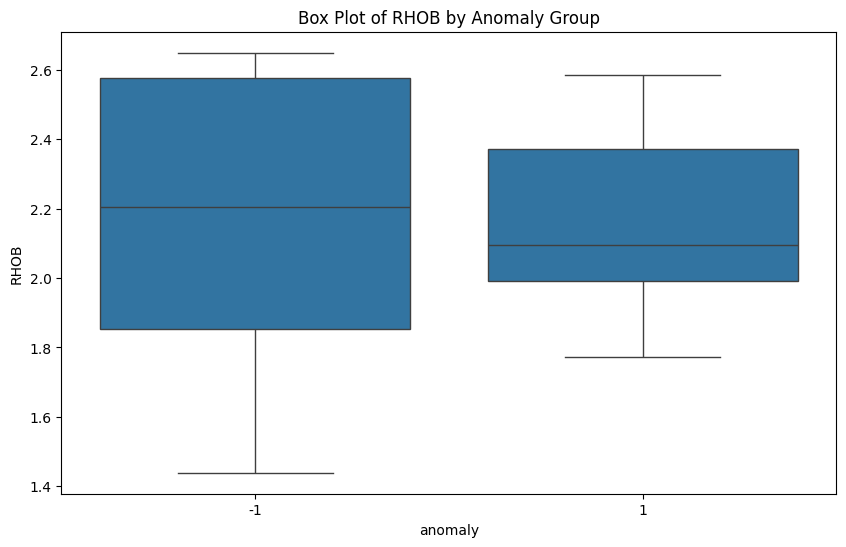

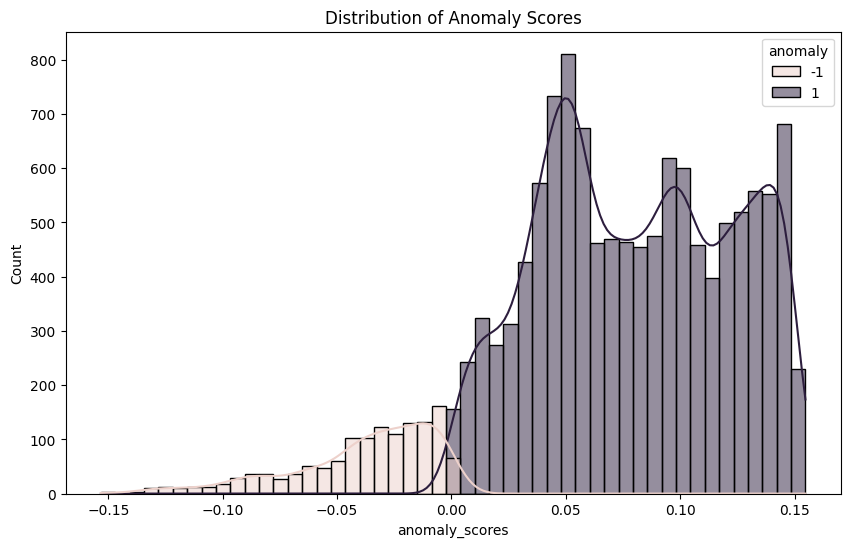

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Mean values for normal and anomalous data:")
print(df.groupby('anomaly')[['NPHI', 'RHOB', 'anomaly_scores']].mean())

print("\nStandard deviations:")
print(df.groupby('anomaly')[['NPHI', 'RHOB', 'anomaly_scores']].std())

print("\nDescriptive statistics for normal data:")
print(df[df['anomaly'] == 1][['NPHI', 'RHOB']].describe())  # Normal data

print("\nDescriptive statistics for anomalous data:")
print(df[df['anomaly'] == -1][['NPHI', 'RHOB']].describe()) # Anomalous data

# Box plots to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='anomaly', y='NPHI', data=df)
plt.title('Box Plot of NPHI by Anomaly Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='anomaly', y='RHOB', data=df)
plt.title('Box Plot of RHOB by Anomaly Group')
plt.show()

# Histograms to see frequency distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='anomaly_scores', hue='anomaly', kde=True)
plt.title('Distribution of Anomaly Scores')
plt.show()

In [ ]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

**1. Function Definition:**

```python
def outlier_plot(data, outlier_method_name, x_var, y_var, xaxis_limits=[0,1], yaxis_limits=[0,1]):
```

* This line defines a function named `outlier_plot`.
* It takes several arguments:
    * `data`: The Pandas DataFrame containing the data.
    * `outlier_method_name`: A string representing the name of the outlier detection method used (e.g., "Isolation Forest").
    * `x_var`: The name of the column in the DataFrame to be used for the x-axis of the plot.
    * `y_var`: The name of the column in the DataFrame to be used for the y-axis of the plot.
    * `xaxis_limits`: (Optional) A list specifying the x-axis limits for the plot. It defaults to [0, 1].
    * `yaxis_limits`: (Optional) A list specifying the y-axis limits for the plot. It defaults to [0, 1].

**2. Print Outlier Method Name:**

```python
print(f'Outlier Method: {outlier_method_name}')
```

* This line prints the name of the outlier detection method to the console. This helps in identifying the results.

**3. Create a Dynamic Title:**

```python
method = f'{outlier_method_name}_anomaly'
```

* This line creates a string variable `method` by appending "_anomaly" to the `outlier_method_name`. This is likely used to create a more descriptive title for the plot.

**4. Print Key Statistics:**

```python
print(f"Number of anomalous values {len(data[data['anomaly']== -1])}")
print(f"Number of non anomalous values {len(data[data['anomaly']== 1])}")
print(f"Total Number of Values: {len(data)}")
```

* These lines print some important statistics about the detected anomalies:
    * `len(data[data['anomaly'] == -1])`: Calculates the number of data points labeled as anomalous (assuming -1 represents anomalies).
    * `len(data[data['anomaly'] == 1])`: Calculates the number of data points labeled as non-anomalous (assuming 1 represents normal data).
    * `len(data)`: Prints the total number of data points in the DataFrame.

**5. Create the Chart using Seaborn:**

```python
g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
g.map(sns.scatterplot, x_var, y_var)
```

* This section uses the Seaborn library to create a visualization:
    * `g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])`: Creates a `FacetGrid`. This is a multi-plot grid that allows you to create separate plots for different subsets of your data.
        * `data`: The DataFrame.
        * `col='anomaly'`:  Specifies that the grid should have columns based on the unique values in the 'anomaly' column (i.e., it will create one subplot for anomalies and one for non-anomalies).
        * `height=4`: Sets the height of each subplot.
        * `hue='anomaly'`:  Colors the data points based on the 'anomaly' column.
        * `hue_order=[1,-1]`:  Specifies the order of the hues (colors) in the legend.
    * `g.map(sns.scatterplot, x_var, y_var)`:  Maps a scatter plot onto each facet (subplot) of the grid.
        * `sns.scatterplot`:  The type of plot (a scatter plot).
        * `x_var`:  The column to use for the x-axis.
        * `y_var`:  The column to use for the y-axis.

**6. Set Chart Titles and Labels:**

```python
g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
g.set(xlim=xaxis_limits, ylim=yaxis_limits)

axes = g.axes.flatten()
axes[0].set_title(f"Outliers\n{len(data[data['anomaly'] == -1])} points")
axes[1].set_title(f"Inliers\n{len(data[data['anomaly'] == 1])} points")
```

* `g.fig.suptitle(...)`: Sets the overall title of the entire figure (the grid of plots).
    * `f'Outlier Method: {outlier_method_name}'`:  Uses an f-string to include the name of the outlier detection method in the title.
    * `y=1.10`:  Adjusts the vertical position of the title.
    * `fontweight='bold'`:  Makes the title bold.
* `g.set(xlim=xaxis_limits, ylim=yaxis_limits)`:  Sets the x-axis and y-axis limits for all subplots, using the `xaxis_limits` and `yaxis_limits` arguments passed to the function.
* `axes = g.axes.flatten()`:  Gets a 1D array of all the axes (subplots) in the grid.
* `axes[0].set_title(...)`: Sets the title of the first subplot (likely the one showing outliers). It includes the number of outlier points.
* `axes[1].set_title(...)`: Sets the title of the second subplot (likely the one showing inliers/normal data). It includes the number of inlier points.

**7. Return the Plot:**

```python
return g
```

* The function returns the `FacetGrid` object (`g`), which can be further customized or displayed.

**In summary, this `outlier_plot` function takes data, the outlier detection method name, and two variables to plot, and then generates a visualization that:**

* Shows the data points in a scatter plot.
* Separates the data into two plots: one for outliers and one for normal data.
* Provides titles and labels that clearly indicate the outlier detection method and the number of points in each group.

This function is a useful tool for visualizing and understanding the results of outlier detection algorithms.

Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11961
Total Number of Values: 13290


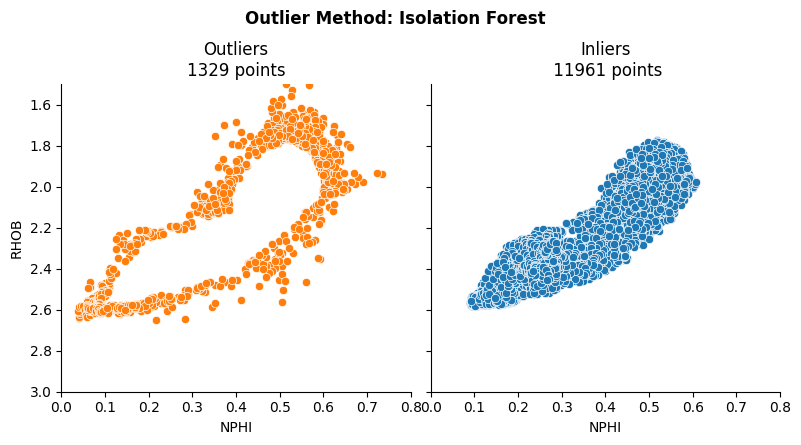

In [ ]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

1.  **Function Call:**

    ```python
    outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);
    ```

    * The `outlier_plot` function is called.
    * It's passed the following arguments:
        * `df`:  A Pandas DataFrame containing the data.
        * `'Isolation Forest'`:  The name of the outlier detection method used.
        * `'NPHI'`:  The column from the DataFrame to be used for the x-axis of the plot.
        * `'RHOB'`: The column from the DataFrame to be used for the y-axis of the plot.
        * `[0, 0.8]`:  The x-axis limits for the plot.
        * `[3, 1.5]`: The y-axis limits for the plot.

2.  **Function Execution:**

    Inside the `outlier_plot` function (as defined in a previous snippet), the following actions are performed:

    * **Print Outlier Method Name:** The string 'Outlier Method: Isolation Forest' is printed.
    * **Print Key Statistics:**
        * The number of anomalous values is calculated and printed. This is done by counting the rows in the DataFrame where the 'anomaly' column is equal to -1.
        * The number of non-anomalous values is calculated and printed. This is done by counting the rows in the DataFrame where the 'anomaly' column is equal to 1.
        * The total number of values (rows) in the DataFrame is printed.
    * **Create the Chart:**
        * A Seaborn `FacetGrid` is created, which will generate a multi-plot grid. The data is split into two columns based on the 'anomaly' column. Data points are colored based on the 'anomaly' column.
        * A scatter plot is mapped onto each facet of the grid, using 'NPHI' for the x-axis and 'RHOB' for the y-axis.
        * Titles and labels are set for the figure and the individual subplots. The number of anomalous and non-anomalous points is included in the subplot titles.

3.  **Output:**

    The function generates a visualization (and prints some statistics) that shows:

    * A scatter plot of 'NPHI' versus 'RHOB'.
    * Two separate plots: one for data points identified as outliers, and one for data points identified as inliers (normal data).
    * The number of data points classified as outliers and inliers.
    * The name of the outlier detection method used (Isolation Forest).

In summary, this code segment calls a plotting function to visualize and summarize the results of an Isolation Forest anomaly detection analysis, displaying the relationship between two variables ('NPHI' and 'RHOB') and highlighting the separation between detected outliers and normal data.

Outlier Method: Isolation Forest
Number of anomalous values 3986
Number of non anomalous values  9304
Total Number of Values: 13290


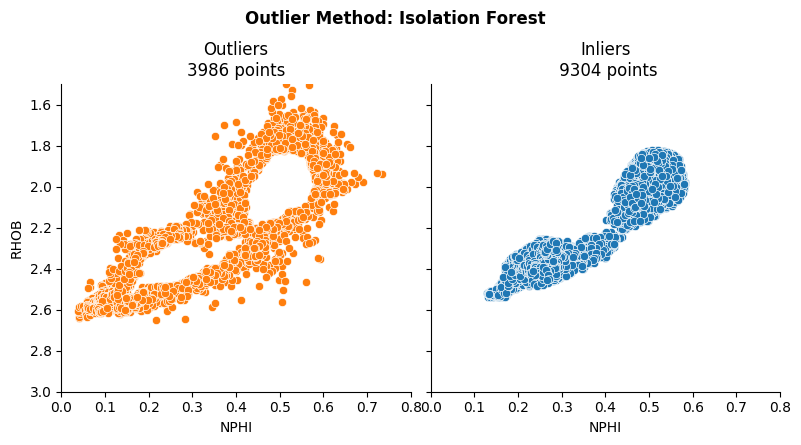

In [ ]:
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])

df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

1.  **Model Initialization and Training:**

    ```python
    model_IF = IsolationForest(contamination=float(0.3), random_state=42)
    model_IF.fit(df[anomaly_inputs])
    ```

    * An Isolation Forest model (`model_IF`) is created.
    * `contamination=float(0.3)`: This parameter is set, indicating the model is expected to find approximately 30% of the data points as anomalies.
    * `random_state=42`: A seed is set for the random number generator, ensuring the model's behavior is reproducible across different runs.
    * `model_IF.fit(df[anomaly_inputs])`: The model is trained using the data specified by the `anomaly_inputs` variable. This means the model learns what "normal" data looks like.

2.  **Anomaly Score and Label Assignment:**

    ```python
    df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
    df['anomaly'] = model_IF.predict(df[anomaly_inputs])
    ```

    * `df['anomaly_scores'] = ...`:  Anomaly scores are calculated for each data point using the trained model's `decision_function()`. Lower scores indicate a higher likelihood of being an anomaly. These scores are stored in a new column named `anomaly_scores` in the DataFrame.
    * `df['anomaly'] = ...`: Anomaly labels are assigned to each data point using the trained model's `predict()` method.  The typical output is 1 for normal data points and -1 for anomalies. These labels are stored in a new column named `anomaly`.

3.  **Visualization (Implied):**

    ```python
    outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);
    ```

    * A function `outlier_plot` is called to visualize the results.
    * This function likely generates a scatter plot of the data, separating the data points labeled as anomalies from those labeled as normal.
    * The plot uses the 'NPHI' and 'RHOB' columns as x and y axes, respectively.
    * The x-axis limits are set to [0, 0.8], and the y-axis limits are set to [3, 1.5].
    * The function also likely prints some summary statistics.

4.  **Output Statistics:**

    ```
    Outlier Method: Isolation Forest
    Number of anomalous values 3986
    Number of non anomalous values 9304
    Total Number of Values: 13290
    ```

    * These lines print:
        * The name of the method used: "Isolation Forest."
        * The number of data points classified as anomalies: 3986.
        * The number of data points classified as non-anomalous: 9304.
        * The total number of data points: 13290.

**In essence, the code:**

1.  Trains an Isolation Forest model on a subset of the data.
2.  Uses that model to assign anomaly scores and labels to the entire dataset.
3.  Visualizes the results and provides summary statistics about the number of anomalies detected.

The key takeaway is that the Isolation Forest algorithm identifies data points that deviate significantly from the learned "normal" patterns, and these deviations are then highlighted and quantified.

**The `contamination` Parameter**

The primary driver of the difference in the number of anomalous values is the `contamination` parameter of the `IsolationForest` algorithm in scikit-learn.

* **What it does:** The `contamination` parameter is an estimate of the proportion of outliers in the dataset. It's a crucial parameter that influences how the Isolation Forest algorithm determines the threshold for classifying data points as anomalies.
* **How it affects the results:**
    * If you set a higher `contamination` value (e.g., 0.3, meaning you expect 30% outliers), the algorithm will be more aggressive in flagging data points as anomalies. It will find more points that it considers "different" to reach that target.
    * If you set a lower `contamination` value (e.g., 0.01, meaning you expect 1% outliers), the algorithm will be more conservative and flag fewer points as anomalies. It will only identify the most extreme deviations.

**Why the Numbers Change in Your Examples**

The different numbers of anomalous and non-anomalous values indicate that the `contamination` parameter was likely set to different values in the different runs of the Isolation Forest algorithm.

* **Example 1 (1329 Anomalies):** In the first example, the code shows:

    ```
    Number of anomalous values 1329
    Number of non anomalous values 11961
    Total Number of Values: 13290
    ```

    This suggests a relatively low contamination setting, as only a small fraction of the 13290 points are classified as outliers.

* **Example 2 (3986 Anomalies):** In the second example, the code shows:

    ```
    Number of anomalous values 3986
    Number of non anomalous values 9304
    Total Number of Values : 13290
    ```

    This indicates a higher contamination setting, as a significantly larger proportion of the data is now labeled as anomalous.

**Important Considerations**

* **Choosing `contamination`:**
    * Ideally, you should have some prior knowledge or estimate of the actual proportion of outliers in your data.
    * If you don't have a good estimate, you might need to experiment with different `contamination` values and evaluate the results based on your domain knowledge and the visual patterns in the data.
* **Impact on Interpretation:** The `contamination` parameter heavily influences how you interpret the results. A higher value might highlight more subtle deviations, while a lower value will focus on the most extreme outliers.

In conclusion, the difference in the number of detected anomalies is directly caused by the different settings of the `contamination` parameter in the Isolation Forest algorithm.

In [ ]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11961
Total Number of Values: 13290


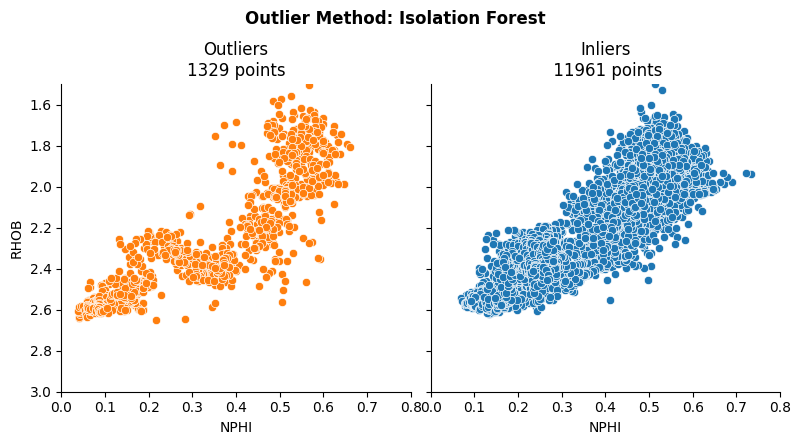

In [ ]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

1.  **Feature Selection:**

    ```python
    anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']
    ```

    * A list named `anomaly_inputs` is created, containing the names of six columns: 'NPHI', 'RHOB', 'GR', 'CALI', 'PEF', and 'DTC'. These column names likely represent different well log measurements. This means the Isolation Forest model will now consider these six variables to identify anomalies, instead of just 'NPHI' and 'RHOB' as in previous examples.

2.  **Model Initialization and Training:**

    ```python
    model_IF = IsolationForest(contamination=0.1, random_state=42)
    model_IF.fit(df[anomaly_inputs])
    ```

    * An Isolation Forest model (`model_IF`) is created.
    * `contamination=0.1`: The model is configured to expect 10% of the data points to be anomalies.
    * `random_state=42`: A random seed is set for reproducibility.
    * `model_IF.fit(df[anomaly_inputs])`: The model is trained using the specified columns from the DataFrame `df`.

3.  **Anomaly Score and Label Assignment:**

    ```python
    df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
    df['anomaly'] = model_IF.predict(df[anomaly_inputs])
    ```

    * `df['anomaly_scores'] = ...`: Anomaly scores are calculated for each data point using the trained model. Lower scores indicate a higher likelihood of being an anomaly. These scores are stored in the `anomaly_scores` column.
    * `df['anomaly'] = ...`: Anomaly labels (1 for normal, -1 for anomaly) are assigned to each data point and stored in the `anomaly` column.

4.  **Visualization (Implied):**

    ```python
    outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);
    ```

    * The `outlier_plot` function is called to visualize the results.
    * It's passed the DataFrame, the method name, 'NPHI' and 'RHOB' as the variables to plot, and the x and y axis limits.

5.  **Output Statistics:**

    ```
    Outlier Method: Isolation Forest
    Number of anomalous values 1329
    Number of non anomalous values 11961
    Total Number of Values: 13290
    ```

    * The output provides:
        * The name of the method: "Isolation Forest."
        * The number of anomalous values: 1329.
        * The number of non-anomalous values: 11961.
        * The total number of values: 13290.

**Key Differences from Previous Examples:**

The main difference here is the **input features** used for anomaly detection. In this case, the Isolation Forest model is trained and makes predictions based on all six columns: 'NPHI', 'RHOB', 'GR', 'CALI', 'PEF', and 'DTC'. Previous examples might have used only 'NPHI' and 'RHOB'.

This change in input features can significantly affect the results of the anomaly detection. The model now considers more information to determine what is "normal" and what is "anomalous."

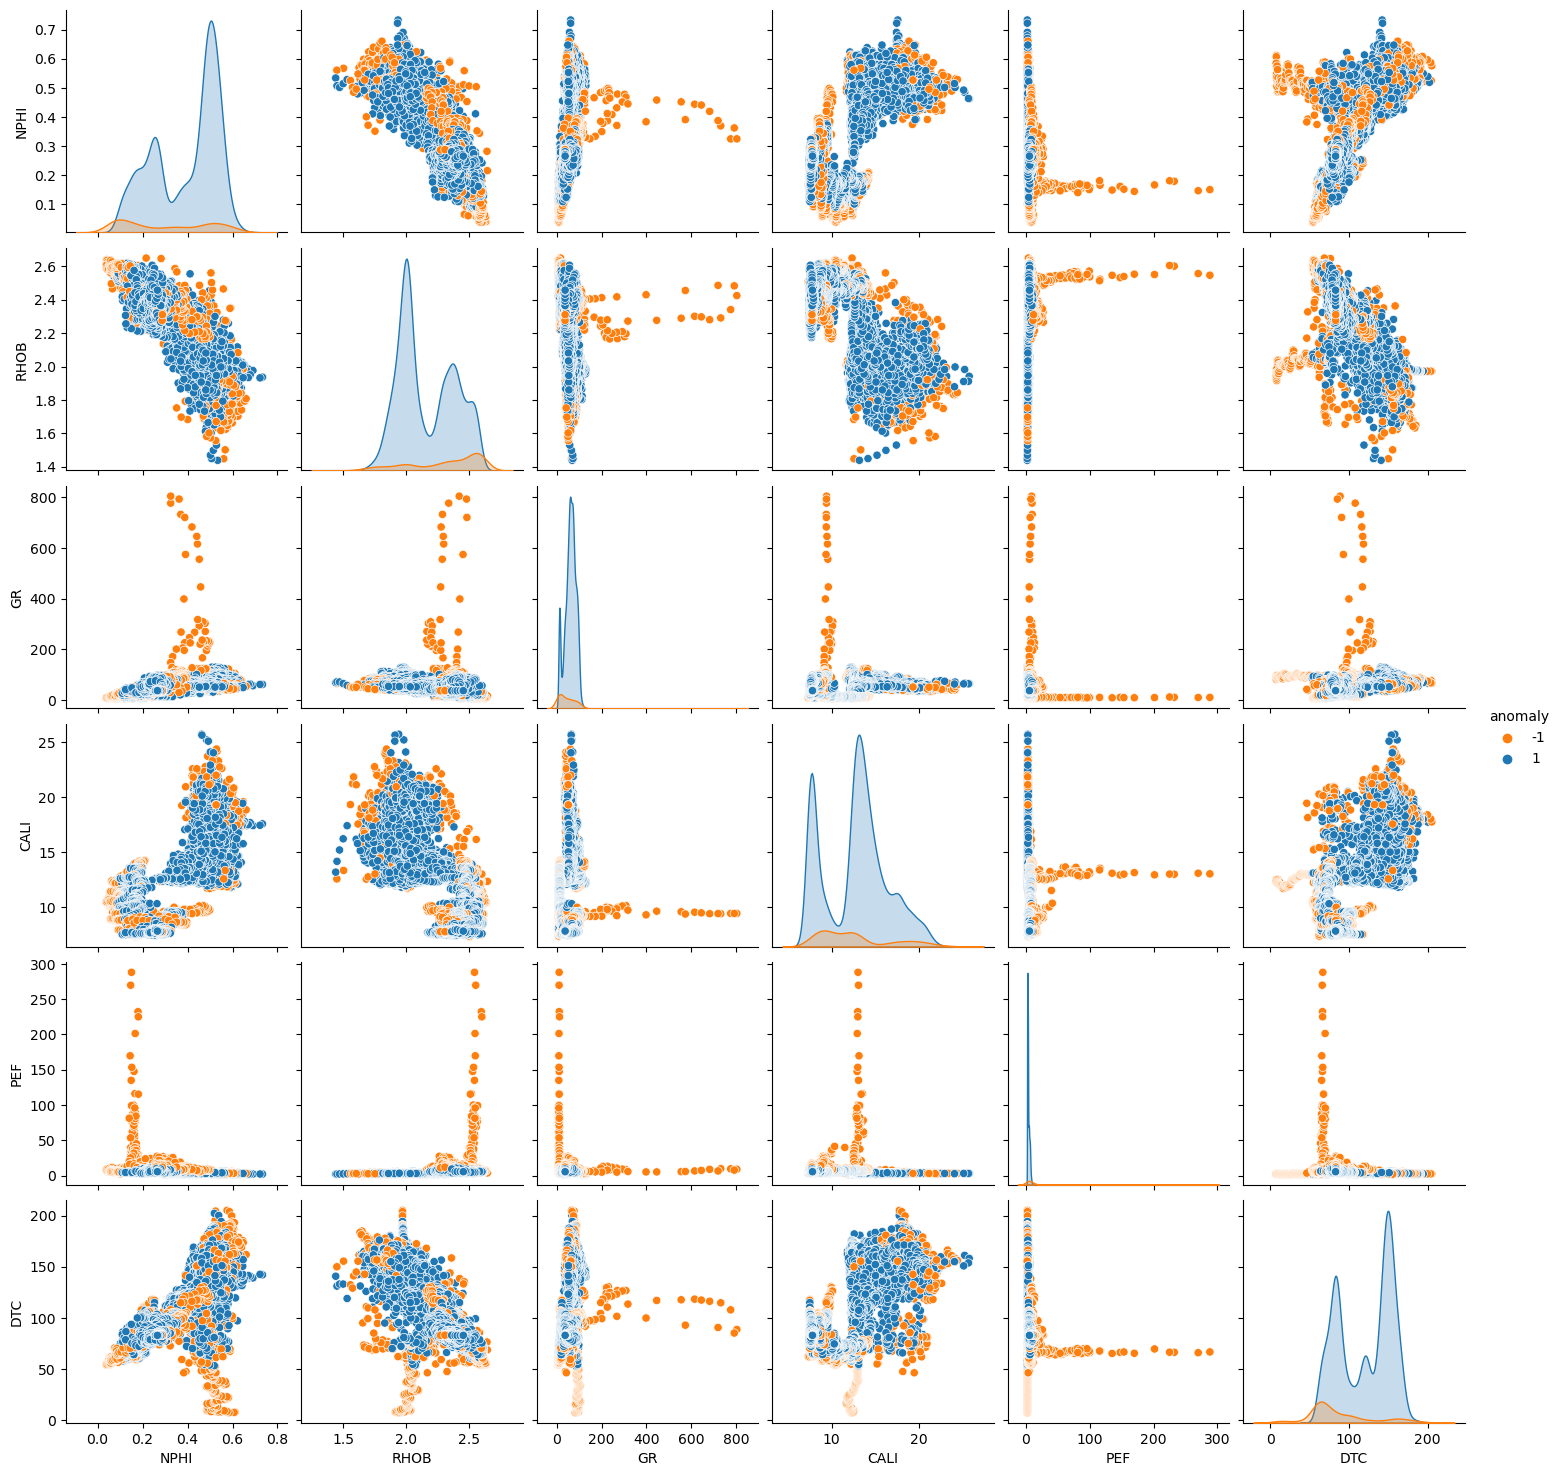

In [ ]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

**Purpose of a Pairplot**

A pairplot is a powerful visualization tool that helps you understand the relationships between multiple variables in your dataset. It creates a matrix of plots:

* **Diagonal Subplots:** On the diagonal, you'll typically find the univariate distribution of each variable (e.g., histograms or kernel density estimates). This shows you the shape and spread of individual variables.
* **Off-Diagonal Subplots:** The off-diagonal subplots are scatter plots. Each scatter plot shows the relationship between two different variables.

**Why Pairplots Are Useful in Anomaly Detection**

1.  **Visualizing Relationships:**
    * Anomaly detection often relies on the assumption that anomalies deviate from the normal relationships between variables. Pairplots help you visually identify these deviations.
    * For example, if two variables are normally strongly correlated, anomalies might appear as points that fall far off the general trend.

2.  **Identifying Potential Separability:**
    * Pairplots can reveal if anomalies tend to cluster in certain regions of the data space. This can help you understand if the anomaly detection algorithm is effectively separating anomalies from normal data.

3.  **Feature Analysis:**
    * Pairplots can give you insights into which features might be most useful for distinguishing anomalies. Variables that show clear separation between normal and anomalous points in the scatter plots are likely to be important.

4.  **Data Exploration:**
    * Before or after anomaly detection, pairplots are helpful for general data exploration. They can reveal patterns, correlations, and potential issues (e.g., outliers) in the data itself, which might be relevant to the anomaly detection process.

**In the context of the image, the pairplot is likely used to:**

* Visually explore the relationships between the features used in the anomaly detection.
* See how the anomalies (likely colored differently, as indicated by the legend) are distributed with respect to these relationships.
* Gain a better understanding of the characteristics that make the anomalies different from the normal data.

**Left Plot (Vertical Pattern):**

* **X-axis:** This axis has a very limited range, with most data points clustered at the leftmost side. The scale suggests it might represent a variable with low values.
* **Y-axis:** This axis has a wider range of values.
* **Relationship:** There's a strong vertical pattern.
    * The "normal" data (blue) is concentrated in a narrow band on the left.
    * The "anomalies" (orange) are scattered more widely along the vertical axis, but mostly on the right side of the blue cluster.

    **Interpretation:** This suggests that the variable on the X-axis is a strong discriminator between normal and anomalous data. The normal data has a very specific, low range of values for this variable. The anomalous data has a wider range, including higher values, indicating that deviations in this variable are key to identifying outliers.

**Right Plot (Diagonal/Curved Pattern):**

* **X-axis:** This axis has a wider range of values.
* **Y-axis:** This axis also has a wider range of values.
* **Relationship:** There's a more complex, diagonal or curved relationship.
    * The "normal" data (blue) forms a fairly dense, elongated cluster with a noticeable curve.
    * The "anomalies" (orange) are scattered around this cluster, often forming a boundary or a less dense outer ring.

    **Interpretation:** This indicates that both variables are important for distinguishing anomalies. The normal data exhibits a specific, non-linear correlation. The anomalous data deviates from this relationship, suggesting that outliers have unusual combinations of values for these two variables.

**Overall Implications for Anomaly Detection:**

* These plots show that the anomaly detection algorithm is likely identifying outliers based on deviations from the typical relationships between the variables.
* The left plot suggests that one variable (X-axis) might be a stronger indicator of anomalies when it has higher values.
* The right plot implies that a combination of both variables, specifically deviations from their curved relationship, is important for spotting outliers.

To give you a more specific interpretation, I would need to know what the X and Y axes represent (the names of the variables).

## Compare / Contrast Random Forest and Isolation Forest
Random Forest and Isolation Forest are both powerful ensemble learning algorithms that utilize decision trees. However, they are designed for fundamentally different tasks: **classification/regression** (Random Forest) and **anomaly detection** (Isolation Forest). Here's a comparison and contrast of the two:

**Random Forest:**

* **Primary Task:** Supervised learning for **classification** (predicting a categorical label) and **regression** (predicting a continuous value).
* **Goal:** To build a robust and accurate predictive model by learning the relationships between features and the target variable from labeled data.
* **Mechanism:**
    * Constructs multiple decision trees (a "forest") on different subsets of the training data (bootstrapping).
    * When building each tree, it considers only a random subset of features at each split.
    * The final prediction is made by aggregating the predictions of all the trees (e.g., majority vote for classification, average for regression).
* **Key Characteristics:**
    * **Supervised Learning:** Requires labeled training data (features and corresponding target variable).
    * **Prediction-Focused:** Aims to predict the value of a target variable for new, unseen data.
    * **Ensemble of Deep Trees:** Individual trees can grow relatively deep to capture complex relationships.
    * **Feature Importance:** Can provide insights into which features are most important for the prediction task.
    * **Handles High Dimensionality:** Performs well with a large number of features.
    * **Robust to Overfitting:** The ensemble nature and random feature selection help prevent overfitting to the training data.
* **Output:** A predicted class label (classification) or a predicted numerical value (regression).

**Isolation Forest:**

* **Primary Task:** Unsupervised learning for **anomaly detection** (identifying data points that deviate significantly from the normal data).
* **Goal:** To isolate anomalous data points more easily than normal data points.
* **Mechanism:**
    * Builds multiple isolation trees (iTrees) by randomly partitioning the data.
    * For each tree, it randomly selects a feature and then randomly selects a split value within the range of that feature.
    * Anomalies, being rare and different, tend to be isolated in fewer splits (shorter path length in the trees).
    * A score is calculated for each data point based on its average path length across all the iTrees. Shorter average path lengths indicate a higher likelihood of being an anomaly.
* **Key Characteristics:**
    * **Unsupervised Learning:** Does not require labeled anomaly data. It learns the "normal" data distribution implicitly.
    * **Isolation-Focused:** Explicitly tries to isolate anomalies rather than modeling the normal data.
    * **Ensemble of Shallow Trees:** Individual trees are typically kept shallow to isolate anomalies quickly.
    * **Anomaly Score:** Outputs an anomaly score for each data point, indicating its degree of abnormality.
    * **Effective for High-Dimensional Data:** Can handle datasets with many features.
    * **Efficient:** Generally has lower computational complexity compared to some other anomaly detection methods.
* **Output:** An anomaly score (typically between -1 and 1, where values closer to -1 indicate a higher probability of being an anomaly).

**Here's a table summarizing the key differences:**

| Feature           | Random Forest                       | Isolation Forest                     |
| :---------------- | :---------------------------------- | :----------------------------------- |
| **Primary Task** | Classification, Regression          | Anomaly Detection                    |
| **Learning Type** | Supervised                          | Unsupervised                         |
| **Goal** | Prediction of a target variable     | Isolation of anomalies               |
| **Data Labels** | Requires labeled data               | Does not require labeled anomalies   |
| **Tree Depth** | Typically deep                      | Typically shallow                    |
| **Splitting** | Based on maximizing information gain (or minimizing error) w.r.t. target | Based on random feature and split value |
| **Output** | Class label or numerical value      | Anomaly score                        |
| **Anomaly Handling** | Can be used for anomaly detection if anomalies are labeled as a separate class, but not its primary purpose. | Specifically designed for anomaly detection. |

**Similarities:**

* **Ensemble Methods:** Both algorithms rely on creating an ensemble (forest) of decision trees.
* **Tree-Based:** Both utilize decision tree structures as their base learners.
* **Randomness:** Both introduce randomness in the tree building process (subsampling of data and/or features) to improve robustness and generalization.
* **Handle High Dimensionality:** Both can effectively handle datasets with a large number of features.

**In essence:**

* **Random Forest learns the relationship between features and a known outcome.** It's like learning what a "cat" looks like from labeled images of cats and non-cats.
* **Isolation Forest learns what "normal" data looks like by seeing how easily data points can be isolated.** Anomalies are those points that are easily separated because they are different from the majority. It's like finding the unusual-looking object in a collection of similar items without explicitly defining what "unusual" means beforehand.

Understanding these fundamental differences is crucial for choosing the appropriate algorithm for a given machine learning task. If you have labeled data and want to predict a specific outcome, Random Forest is likely the better choice. If you have unlabeled data and want to identify rare and unusual instances, Isolation Forest is a more suitable algorithm.

## UNSW_NB15 Isolation Forest

https://colab.research.google.com/drive/1O07CpGmQLe9BzI3QLd2KnH3wWD_MMiEB?usp=sharing